In [1]:
import pyodbc
import os
import pandas as pd

In [2]:
server = 'DESKTOP-GJR311M\\PROJECT_BI_2BA2'  # Your server name
database = 'Youtube_DB'  # Replace with your actual database name

# Use Trusted_Connection=yes for Windows Authentication
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
# Test the connection
try:
    conn = pyodbc.connect(conn_str)
    print("Connection successful!")
    conn.close()
except Exception as e:
    print(f"Error: {e}")

Connection successful!


In [3]:
try:
    conn = pyodbc.connect(conn_str)
    print("Connection successful!")
    
    # Define the query
    query = """
    SELECT Country, AVG(CAST(Subscribers AS FLOAT)) AS Avg_Subscribers
    FROM channels
    GROUP BY Country
    ORDER BY Avg_Subscribers DESC;
    """
    
    # Execute the query and fetch results into a pandas DataFrame
    df = pd.read_sql(query, conn)
    
    # Close the connection
    conn.close()
    
    # Display the result
    print(df)
except Exception as e:
    print(f"Error: {e}")

Connection successful!
          Country  Avg_Subscribers
0   United States      44210999.98
1  United Kingdom      13502599.99
2          Canada       9597600.00
3       Australia       6719800.00


C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\2999916365.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [4]:
import matplotlib.pyplot as plt

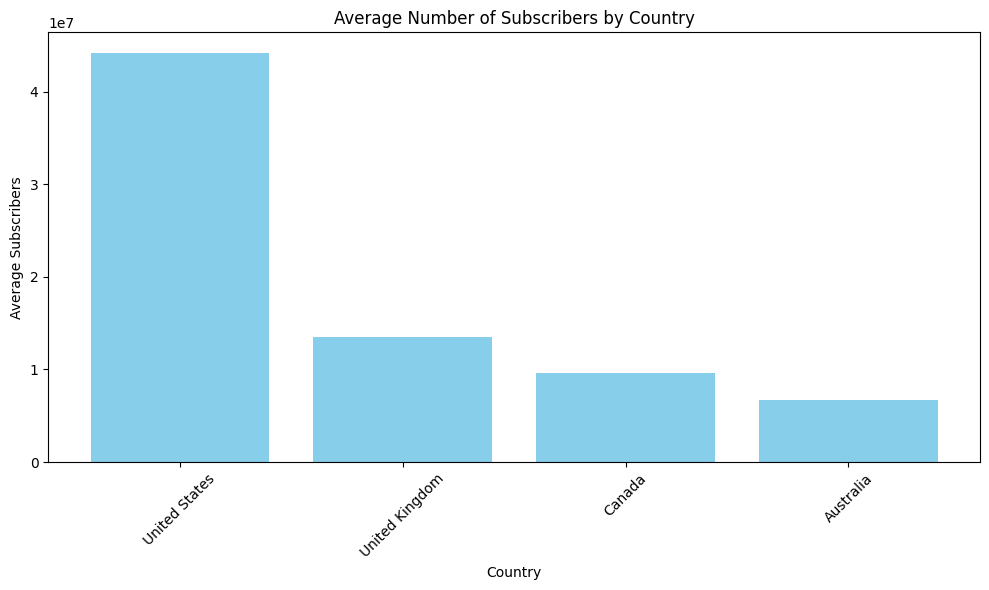

In [5]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Avg_Subscribers'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Subscribers')
plt.title('Average Number of Subscribers by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion:
The bar chart shows that channels in the United States have a significantly higher average subscriber count compared to the other countries (United Kingdom, Canada, and Australia). This suggests that U.S.-based YouTube channels among the top 100 are reaching larger audiences on average, possibly due to a larger domestic market and the global appeal of U.S. content.

In contrast:

United Kingdom and Canada have moderate average subscriber counts, which could indicate a strong but more regionally focused audience.
Australia has the lowest average subscriber count, suggesting a smaller reach compared to the other regions.
This pattern indicates that U.S.-based channels dominate in subscriber numbers, potentially making the U.S. an attractive market for international brands aiming for maximum reach.

## Question 2: What is the Average Engagement Rate by Category and Country?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\678658536.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_engagement = pd.read_sql(query, conn)


           Country          Category  Avg_Engagement_Rate
0        Australia   News-&-Politics             7.960000
1        Australia        Technology             6.030000
2           Canada        Technology             5.190000
3   United Kingdom            Gaming             4.387857
4           Canada         Education             3.940000
5   United Kingdom             Music             3.738667
6   United Kingdom        Technology             3.680000
7        Australia  Autos-&-Vehicles             3.605000
8           Canada            Health             3.410000
9        Australia            Health             3.330000
10   United States            Gaming             3.283750
11          Canada         Lifestyle             3.266774
12       Australia            Gaming             3.255455
13       Australia         Lifestyle             3.194286
14       Australia             Music             3.172222
15          Canada             Music             3.158000
16       Austr

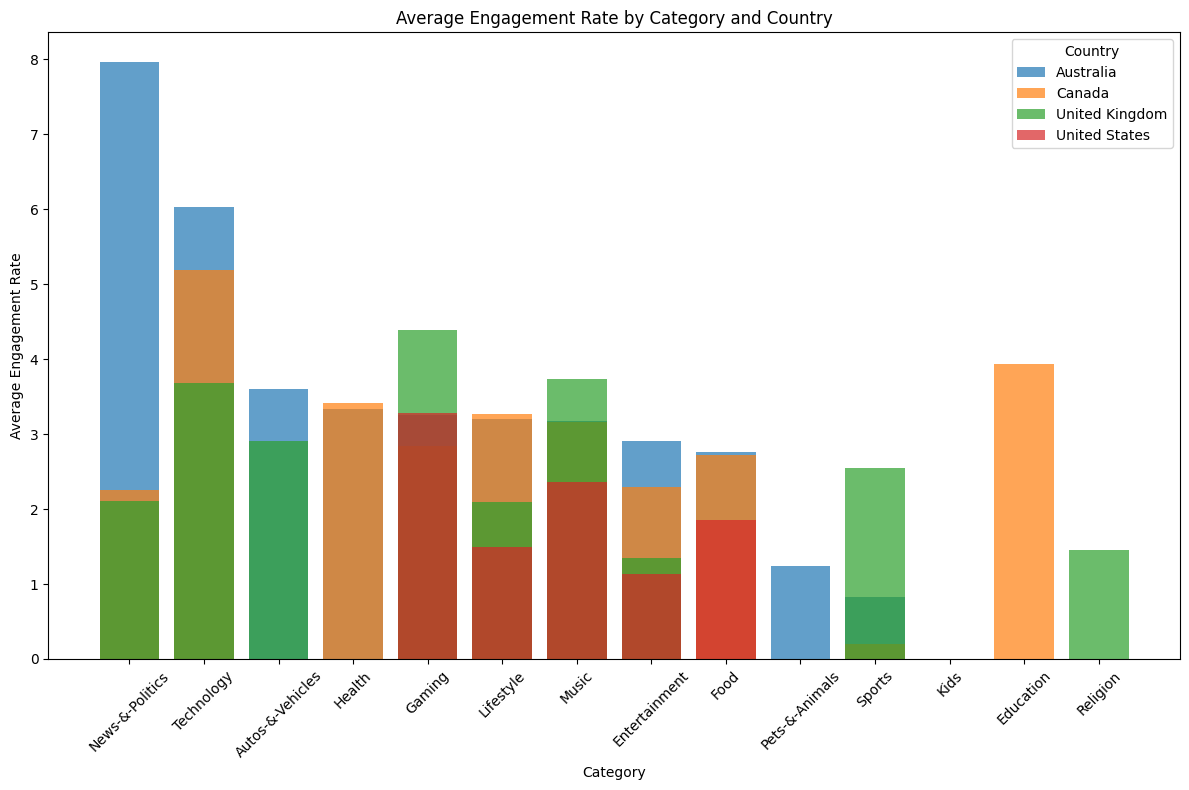

In [6]:
# Define the query
query = """
SELECT Country, Category, AVG(CAST(Engagement_Rate AS FLOAT)) AS Avg_Engagement_Rate
FROM channels
GROUP BY Country, Category
ORDER BY Avg_Engagement_Rate DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_engagement = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_engagement)
    
    # Plotting the data
    plt.figure(figsize=(12, 8))
    for country in df_engagement['Country'].unique():
        subset = df_engagement[df_engagement['Country'] == country]
        plt.bar(subset['Category'], subset['Avg_Engagement_Rate'], label=country, alpha=0.7)
    
    plt.xlabel('Category')
    plt.ylabel('Average Engagement Rate')
    plt.title('Average Engagement Rate by Category and Country')
    plt.xticks(rotation=45)
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Engagement Rate Insights by Category and Country

- **Australia**: Highest engagement in **News & Politics**.
- **Canada**: Strong interest in **Education** content.
- **United Kingdom** & **United States**: Moderate engagement in **Music** and **Entertainment**.

- **Cross-Country Trends**: 
  - **Technology** and **Gaming** have high engagement across multiple regions, indicating global appeal.
  
- **Key Takeaways**:
  - **News & Politics** and **Education** drive the highest engagement in specific countries.
  - **Technology** and **Gaming** attract consistently engaged audiences worldwide, making them strong choices for international content strategies.


# Question 3: What is the Average Monthly Earning by Category and Country?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\1189239185.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_earnings = pd.read_sql(query, conn)


           Country          Category  Avg_Max_Monthly_Earning
0    United States     Entertainment             2.131397e+06
1    United States         Lifestyle             1.840176e+06
2           Canada         Education             1.722950e+06
3        Australia   News-&-Politics             1.200000e+06
4    United States              Food             1.037400e+06
5           Canada            Sports             9.489000e+05
6           Canada     Entertainment             8.113788e+05
7   United Kingdom  Autos-&-Vehicles             7.998500e+05
8           Canada   News-&-Politics             7.205000e+05
9   United Kingdom        Technology             6.791000e+05
10  United Kingdom     Entertainment             5.453487e+05
11   United States             Music             4.474647e+05
12          Canada             Music             4.048400e+05
13  United Kingdom         Lifestyle             4.024118e+05
14  United Kingdom   News-&-Politics             3.703000e+05
15      

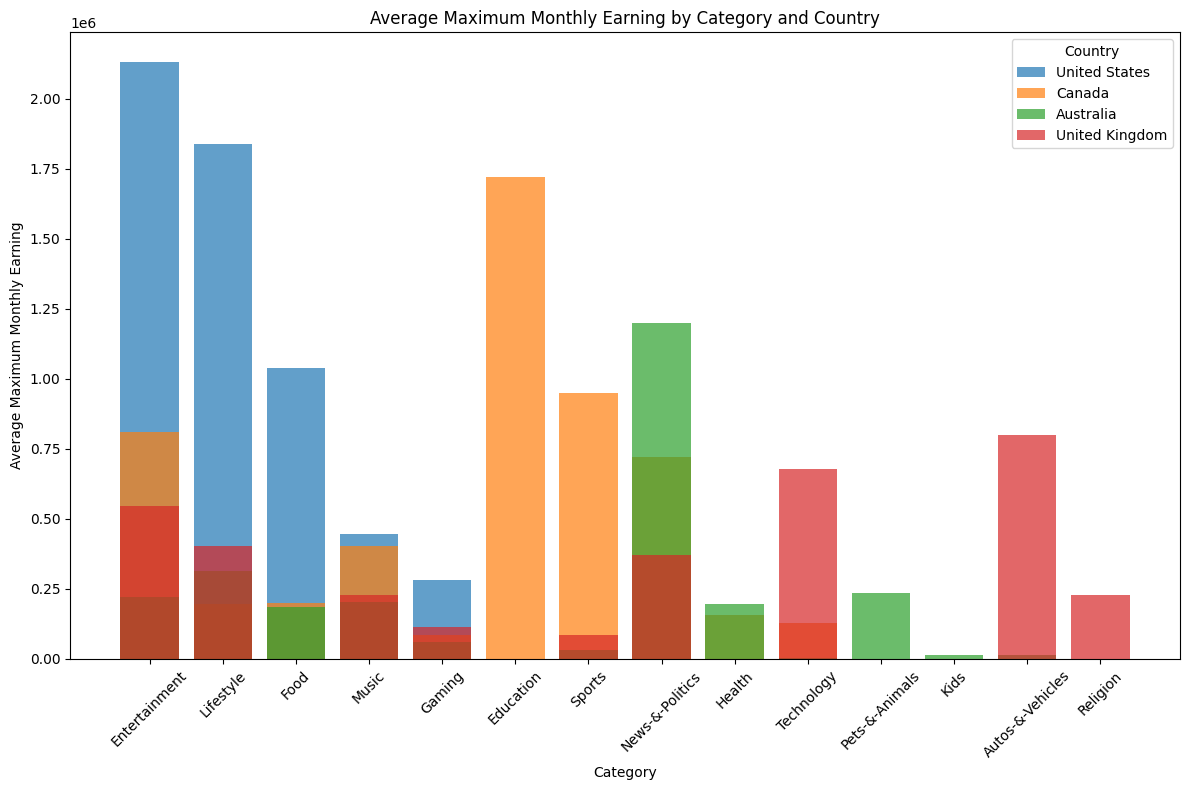

In [7]:
# Define the query
query = """
SELECT Country, Category, AVG(CAST(Max_Monthly_Earning AS FLOAT)) AS Avg_Max_Monthly_Earning
FROM channels
GROUP BY Country, Category
ORDER BY Avg_Max_Monthly_Earning DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_earnings = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_earnings)
    
    # Plotting the data
    plt.figure(figsize=(12, 8))
    for country in df_earnings['Country'].unique():
        subset = df_earnings[df_earnings['Country'] == country]
        plt.bar(subset['Category'], subset['Avg_Max_Monthly_Earning'], label=country, alpha=0.7)
    
    plt.xlabel('Category')
    plt.ylabel('Average Maximum Monthly Earning')
    plt.title('Average Maximum Monthly Earning by Category and Country')
    plt.xticks(rotation=45)
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Average Monthly Earning Insights by Category and Country

- **United States**: Highest earnings in **Entertainment**, **Lifestyle**, and **Food** categories, indicating a lucrative market for these content types.
- **Canada**: Strong earnings in **Education** and **Sports**, suggesting high monetization potential for educational and sports-related content.
- **Australia**: High earnings in **News & Politics**, showing strong monetization in this category.
- **United Kingdom**: Significant earnings in **Autos & Vehicles** and **Technology**, pointing to niche but profitable content areas.

- **Key Takeaways**:
  - **Entertainment and Lifestyle** are top-earning categories in the U.S.
  - **Education** and **Sports** are particularly profitable in Canada.
  - **Country-Specific Trends**: Different content types are more profitable depending on the region, highlighting the importance of tailoring content strategies to regional preferences.


# Question 4: Does Video Upload Frequency Correlate with Engagement Rate?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\91732255.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_frequency_engagement = pd.read_sql(query, conn)


    Video_Upload_Frequency_per_Week  Avg_Engagement_Rate
0                              0.00             2.489316
1                              0.25             2.602439
2                              0.50             3.064483
3                              0.75             2.067619
4                              1.00             3.090909
5                              1.25             2.245833
6                              1.50             1.941250
7                              1.75             2.840000
8                              2.00             1.192222
9                              2.25             2.345455
10                             2.50             2.273333
11                             2.75             2.993333
12                             3.00             1.846250
13                             3.25             3.084000
14                             3.50             2.773333
15                             3.75             2.128571
16                             

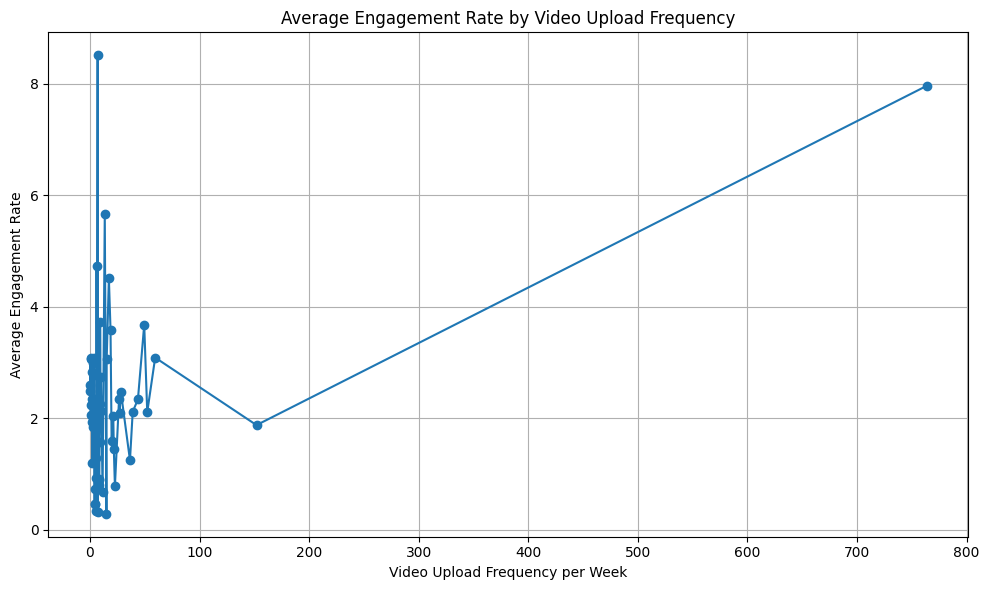

In [8]:
# Define the query
query = """
SELECT Video_Upload_Frequency_per_Week, AVG(CAST(Engagement_Rate AS FLOAT)) AS Avg_Engagement_Rate
FROM channels
GROUP BY Video_Upload_Frequency_per_Week
ORDER BY Video_Upload_Frequency_per_Week;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_frequency_engagement = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_frequency_engagement)
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(df_frequency_engagement['Video_Upload_Frequency_per_Week'], df_frequency_engagement['Avg_Engagement_Rate'], marker='o', linestyle='-')
    plt.xlabel('Video Upload Frequency per Week')
    plt.ylabel('Average Engagement Rate')
    plt.title('Average Engagement Rate by Video Upload Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Engagement Rate by Upload Frequency

- **Optimal Engagement**: Channels posting **under 10 times per week** tend to achieve higher engagement rates.
- **Diminished Engagement**: Posting **10-100 times per week** generally correlates with lower engagement, likely due to content saturation.
- **High Engagement Outlier**: Extremely high frequencies (700+ uploads per week) show high engagement but may be specific to unique content types (e.g., live updates).

**Takeaway**: A balanced posting schedule of fewer than 10 uploads per week appears optimal for sustaining audience engagement.


C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\4018367778.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category_engagement = pd.read_sql(query, conn)


            Category  Avg_Engagement_Rate
0         Technology             4.966667
1          Education             3.940000
2             Gaming             3.443509
3             Health             3.370000
4    News-&-Politics             3.308000
5   Autos-&-Vehicles             3.257500
6              Music             3.063922
7          Lifestyle             2.528899
8               Food             2.515833
9             Sports             1.962727
10     Entertainment             1.788582
11          Religion             1.460000
12    Pets-&-Animals             1.240000
13              Kids             0.000000


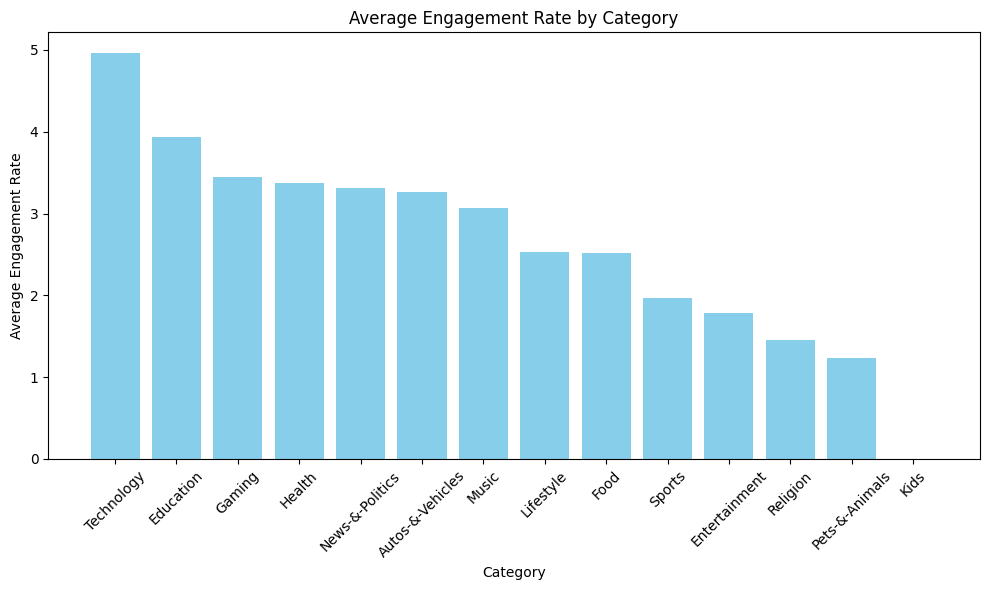

In [9]:
# Define the query
query = """
SELECT Category, AVG(CAST(Engagement_Rate AS FLOAT)) AS Avg_Engagement_Rate
FROM channels
GROUP BY Category
ORDER BY Avg_Engagement_Rate DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_category_engagement = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_category_engagement)
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(df_category_engagement['Category'], df_category_engagement['Avg_Engagement_Rate'], color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Average Engagement Rate')
    plt.title('Average Engagement Rate by Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Engagement Rate by Category

- **Highest Engagement**: **Technology** and **Education** categories lead with the highest average engagement rates, indicating strong audience interaction for informational and educational content.
- **Moderate Engagement**: Categories like **Gaming**, **Health**, and **News & Politics** maintain solid engagement, showing consistent audience interest.
- **Lower Engagement**: **Entertainment**, **Religion**, **Pets & Animals**, and **Kids** have lower engagement rates, possibly due to broader but less interactive audiences.

**Takeaway**: **Technology** and **Education** content attract highly engaged audiences, making these categories ideal for interactive content strategies.


# Question 5: Does Subscriber Count Correlate with Engagement Rate?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\1998656968.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_subscribers_engagement = pd.read_sql(query, conn)


   Subscribers  Engagement_Rate
0  320000000.0             3.21
1  184000000.0             0.28
2  126000000.0             0.19
3  125000000.0             0.26
4  121000000.0             0.14


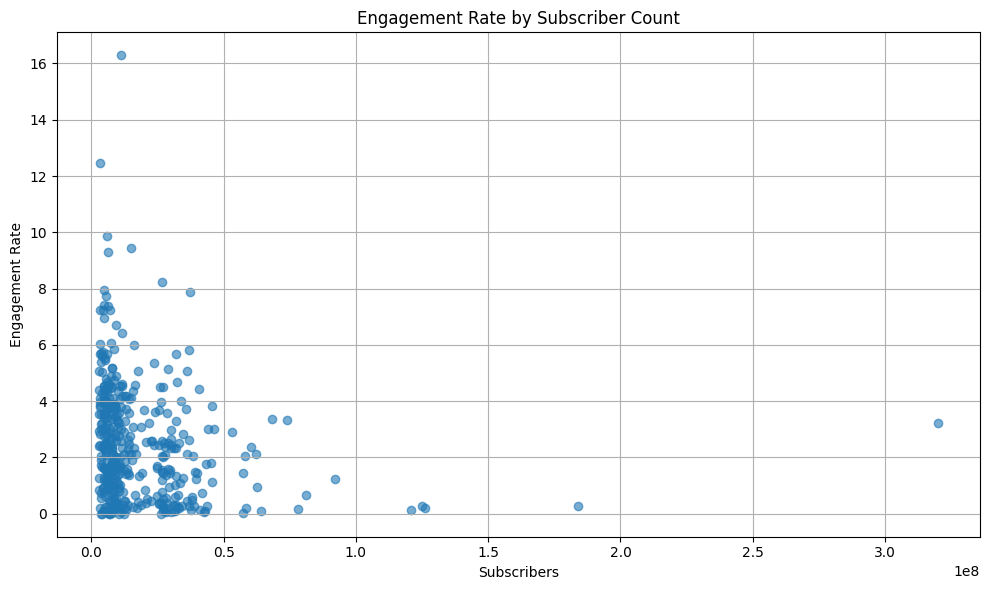

In [10]:
# Define the query
query = """
SELECT CAST(Subscribers AS FLOAT) AS Subscribers, CAST(Engagement_Rate AS FLOAT) AS Engagement_Rate
FROM channels
ORDER BY Subscribers DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_subscribers_engagement = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_subscribers_engagement.head())
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.scatter(df_subscribers_engagement['Subscribers'], df_subscribers_engagement['Engagement_Rate'], alpha=0.6)
    plt.xlabel('Subscribers')
    plt.ylabel('Engagement Rate')
    plt.title('Engagement Rate by Subscriber Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Engagement Rate vs. Subscriber Count

- **Higher Engagement in Smaller Channels**: Channels with **fewer subscribers** (generally under 50 million) show higher engagement rates, often above **4%**, indicating strong audience loyalty and interaction in niche communities.
- **Lower Engagement in Larger Channels**: Channels with **very high subscriber counts** (above 50 million) typically have **lower engagement rates**, often below **2%**, suggesting that it’s harder to maintain high interaction levels as audience size increases.

**Takeaway**: Smaller, niche channels often maintain higher engagement, while larger channels may face challenges in sustaining audience interaction.


# Question 6: How Does Subscriber Count Affect Monthly Earnings?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\3550715328.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_subscriber_ranges = pd.read_sql(query, conn)


  Subscriber_Range  Channel_Count
0          10M-50M            180
1           5M-10M            137
2            1M-5M             64
3         50M-100M             14
4   More than 100M              5


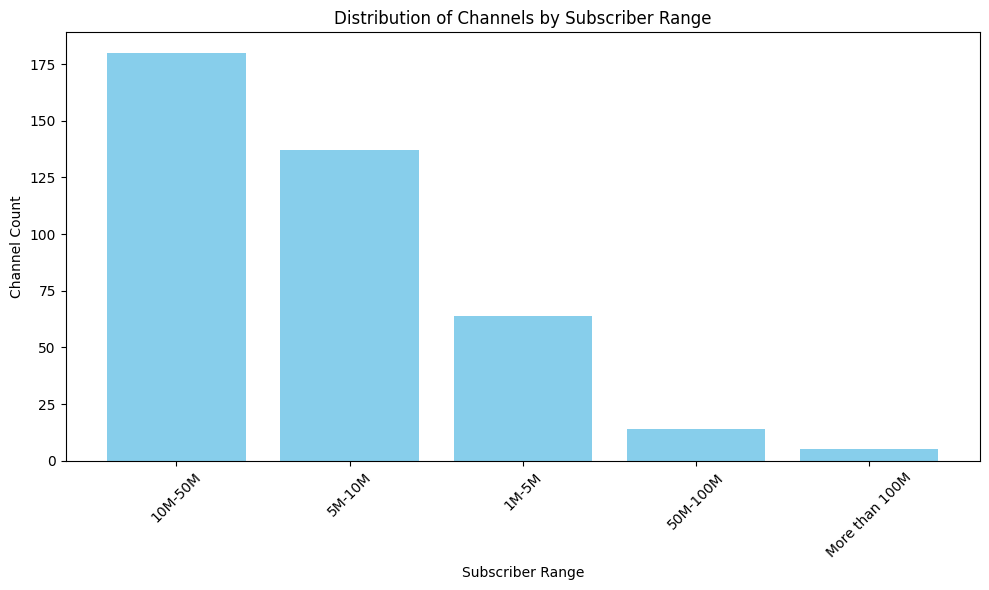

In [11]:
# Define the query
query = """
SELECT 
    CASE 
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 1000000 AND 5000000 THEN '1M-5M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 5000000 AND 10000000 THEN '5M-10M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 10000000 AND 50000000 THEN '10M-50M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 50000000 AND 100000000 THEN '50M-100M'
        ELSE 'More than 100M'
    END AS Subscriber_Range,
    COUNT(*) AS Channel_Count
FROM channels
GROUP BY 
    CASE 
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 1000000 AND 5000000 THEN '1M-5M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 5000000 AND 10000000 THEN '5M-10M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 10000000 AND 50000000 THEN '10M-50M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 50000000 AND 100000000 THEN '50M-100M'
        ELSE 'More than 100M'
    END
ORDER BY Channel_Count DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_subscriber_ranges = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_subscriber_ranges)
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(df_subscriber_ranges['Subscriber_Range'], df_subscriber_ranges['Channel_Count'], color='skyblue')
    plt.xlabel('Subscriber Range')
    plt.ylabel('Channel Count')
    plt.title('Distribution of Channels by Subscriber Range')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Channel Distribution by Subscriber Range

- The majority of top channels have between **10M-50M** subscribers, followed by channels with **5M-10M** subscribers.
- Fewer channels have **1M-5M** subscribers, while only a small number have **50M-100M** and **more than 100M** subscribers.

**Takeaway**: The 10M-50M subscriber range is the most common among top channels, suggesting this is a sweet spot for large, popular channels. Channels with over 50M subscribers are rare, indicating a select few channels reach this level of audience size.


C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\3219083548.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_earnings_subscriber_range = pd.read_sql(query, conn)


  Subscriber_Range  Avg_Max_Monthly_Earning
0   More than 100M             7.260000e+06
1         50M-100M             2.873657e+06
2          10M-50M             8.134194e+05
3           5M-10M             2.116513e+05
4            1M-5M             1.143713e+05


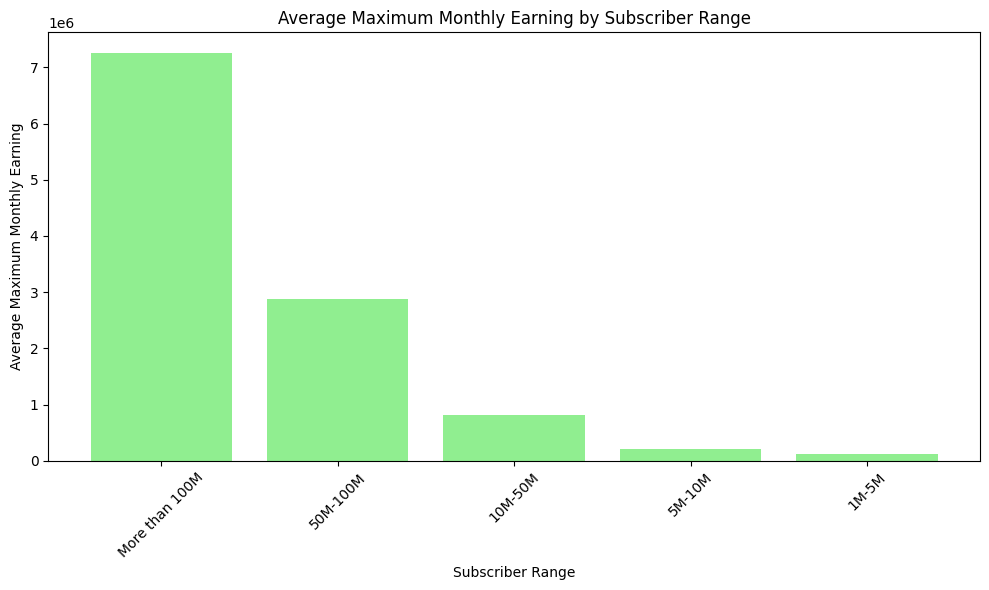

In [12]:
# Define the query
query = """
SELECT 
    CASE 
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 1000000 AND 5000000 THEN '1M-5M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 5000000 AND 10000000 THEN '5M-10M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 10000000 AND 50000000 THEN '10M-50M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 50000000 AND 100000000 THEN '50M-100M'
        ELSE 'More than 100M'
    END AS Subscriber_Range,
    AVG(CAST(Max_Monthly_Earning AS FLOAT)) AS Avg_Max_Monthly_Earning
FROM channels
GROUP BY 
    CASE 
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 1000000 AND 5000000 THEN '1M-5M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 5000000 AND 10000000 THEN '5M-10M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 10000000 AND 50000000 THEN '10M-50M'
        WHEN CAST(Subscribers AS FLOAT) BETWEEN 50000000 AND 100000000 THEN '50M-100M'
        ELSE 'More than 100M'
    END
ORDER BY Avg_Max_Monthly_Earning DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_earnings_subscriber_range = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_earnings_subscriber_range)
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(df_earnings_subscriber_range['Subscriber_Range'], df_earnings_subscriber_range['Avg_Max_Monthly_Earning'], color='lightgreen')
    plt.xlabel('Subscriber Range')
    plt.ylabel('Average Maximum Monthly Earning')
    plt.title('Average Maximum Monthly Earning by Subscriber Range')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Average Monthly Earnings by Subscriber Range

- **More than 100M Subscribers**: Channels with over 100 million subscribers have the highest average monthly earnings, exceeding **$7 million**, indicating massive monetization potential for the largest channels.
- **50M-100M Subscribers**: Channels in this range earn around **$3 million** on average, still very lucrative but significantly less than the top tier.
- **10M-50M Subscribers**: These channels average around **$1 million** in monthly earnings, showing that substantial income is still possible with fewer than 50 million subscribers.
- **5M-10M and 1M-5M Subscribers**: Channels in these ranges show much lower earnings, indicating limited monetization potential compared to larger channels.

**Takeaway**: Monthly earnings increase significantly with subscriber count, especially beyond the 50 million mark, highlighting the substantial earning potential of the largest YouTube channels.


C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\1166561658.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_earnings_engagement_level = pd.read_sql(query, conn)


  Engagement_Level  Avg_Max_Monthly_Earning
0        Low (<2%)            966531.791081
1    Medium (2-5%)            430531.002614
2       High (>5%)            120021.895128


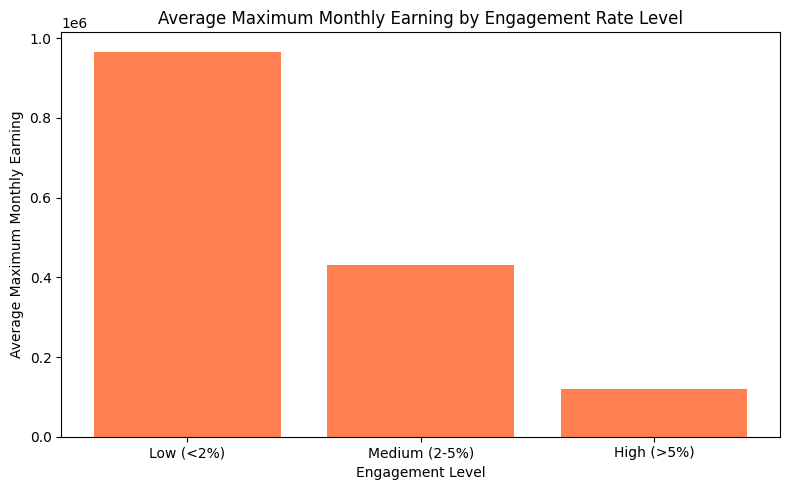

In [13]:
# Define the query
query = """
SELECT 
    CASE 
        WHEN CAST(Engagement_Rate AS FLOAT) < 2 THEN 'Low (<2%)'
        WHEN CAST(Engagement_Rate AS FLOAT) BETWEEN 2 AND 5 THEN 'Medium (2-5%)'
        ELSE 'High (>5%)'
    END AS Engagement_Level,
    AVG(CAST(Max_Monthly_Earning AS FLOAT)) AS Avg_Max_Monthly_Earning
FROM channels
GROUP BY 
    CASE 
        WHEN CAST(Engagement_Rate AS FLOAT) < 2 THEN 'Low (<2%)'
        WHEN CAST(Engagement_Rate AS FLOAT) BETWEEN 2 AND 5 THEN 'Medium (2-5%)'
        ELSE 'High (>5%)'
    END
ORDER BY Avg_Max_Monthly_Earning DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_earnings_engagement_level = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_earnings_engagement_level)
    
    # Plotting the data
    plt.figure(figsize=(8, 5))
    plt.bar(df_earnings_engagement_level['Engagement_Level'], df_earnings_engagement_level['Avg_Max_Monthly_Earning'], color='coral')
    plt.xlabel('Engagement Level')
    plt.ylabel('Average Maximum Monthly Earning')
    plt.title('Average Maximum Monthly Earning by Engagement Rate Level')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Average Monthly Earnings by Engagement Rate Level

- **Low Engagement (<2%)**: Channels with low engagement rates have the highest average monthly earnings, around **$1 million**. This suggests that even with lower engagement, these channels may be leveraging larger audiences or highly profitable content types.
- **Medium Engagement (2-5%)**: Channels in this range have moderate earnings, averaging around **$500,000** per month, indicating balanced engagement and monetization.
- **High Engagement (>5%)**: Surprisingly, channels with high engagement rates have the lowest average earnings, suggesting that these may be niche channels with smaller but more dedicated audiences.

**Takeaway**: Higher engagement rates do not necessarily correlate with higher earnings. Channels with low engagement may still achieve substantial earnings, likely due to broader reach or high-value content.


# Question 8: How Does Video Length Affect Engagement Rate?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\2460341079.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_engagement_video_length = pd.read_sql(query, conn)


  Video_Length_Category  Avg_Engagement_Rate
0        Long (>15 min)             2.753432
1     Medium (5-15 min)             2.391127
2        Short (<5 min)             2.135281


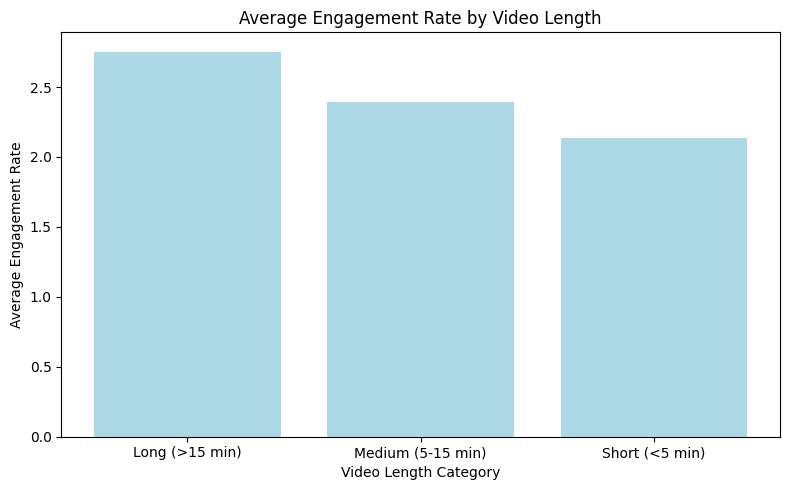

In [14]:
# Define the query
query = """
SELECT 
    CASE 
        WHEN CAST(Average_Video_Length AS FLOAT) < 5 THEN 'Short (<5 min)'
        WHEN CAST(Average_Video_Length AS FLOAT) BETWEEN 5 AND 15 THEN 'Medium (5-15 min)'
        ELSE 'Long (>15 min)'
    END AS Video_Length_Category,
    AVG(CAST(Engagement_Rate AS FLOAT)) AS Avg_Engagement_Rate
FROM channels
GROUP BY 
    CASE 
        WHEN CAST(Average_Video_Length AS FLOAT) < 5 THEN 'Short (<5 min)'
        WHEN CAST(Average_Video_Length AS FLOAT) BETWEEN 5 AND 15 THEN 'Medium (5-15 min)'
        ELSE 'Long (>15 min)'
    END
ORDER BY Avg_Engagement_Rate DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_engagement_video_length = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_engagement_video_length)
    
    # Plotting the data
    plt.figure(figsize=(8, 5))
    plt.bar(df_engagement_video_length['Video_Length_Category'], df_engagement_video_length['Avg_Engagement_Rate'], color='lightblue')
    plt.xlabel('Video Length Category')
    plt.ylabel('Average Engagement Rate')
    plt.title('Average Engagement Rate by Video Length')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Average Engagement Rate by Video Length

- **Long Videos (>15 min)**: Highest average engagement rate, around **2.8%**, indicating that audiences may engage more with longer, in-depth content.
- **Medium Videos (5-15 min)**: Moderate engagement, approximately **2.4%**, suggesting a balanced engagement level for this length.
- **Short Videos (<5 min)**: Lowest engagement rate, around **2.1%**, which may indicate that shorter videos are less engaging.

**Takeaway**: Longer videos tend to drive higher engagement, suggesting that audiences prefer more in-depth content.

# Which YouTube Channels Experienced the Highest Subscriber Growth Rate Over the Last 30 Days?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\3043906795.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_subscriber_growth = pd.read_sql(query, conn)


                   Channel_ID                                 Channel_Name  \
0    UCe6n0z9UbsxYCS8P83f84tw                            Sierra & Rhia FAM   
1    UC5vVe2R4ucoMzJP53o38Yaw  The Wiggles - Kids Songs and Nursery Rhymes   
2    UCWsDFcIhY2DBi3GB5uykGXA                                   IShowSpeed   
3    UCehw6LdDdDwG0fEDh63eiZw                                 Layla Roblox   
4    UCFhXFikryT4aFcLkLw2LBLA                                      NileRed   
..                        ...                                          ...   
395  UCXuqSBlHAE6Xw-yeJA0Tunw                              Linus Tech Tips   
396  UCWXrx8EldKEgeP1KpbmUjBQ                                  DandB World   
397  UCXbQzhqSvgVZTUyi1T4AU3w                                Lauren Curtis   
398  UCZOnSuO8tWFXLp8a828lgtA                                     Funformi   
399  UCZLpYvytvI4PZCs4gmtzqgQ                                   Solnishkam   

          Category  Engagement_Rate  Subscriber_Growth_Rate  
0

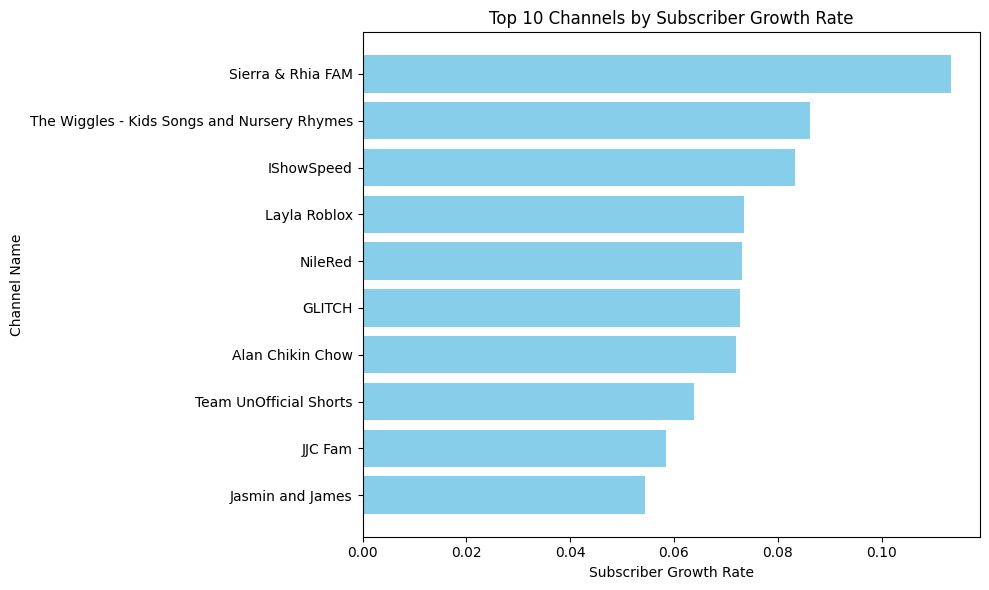

In [19]:
# Define the updated query with Channel name
query = """
SELECT p.Channel_ID,
       c.Channel AS Channel_Name,
       c.Category,
       c.Engagement_Rate,
       (MAX(CAST(p.Subscribers AS FLOAT)) - MIN(CAST(p.Subscribers AS FLOAT))) / NULLIF(MIN(CAST(p.Subscribers AS FLOAT)), 0) AS Subscriber_Growth_Rate
FROM performance p
JOIN channels c ON p.Channel_ID = c.Channel_ID
GROUP BY p.Channel_ID, c.Channel, c.Category, c.Engagement_Rate
ORDER BY Subscriber_Growth_Rate DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_subscriber_growth = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_subscriber_growth)
    
    # Plotting the data - showing the top 10 channels by Subscriber Growth Rate
    top_growth_channels = df_subscriber_growth.head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(top_growth_channels['Channel_Name'], top_growth_channels['Subscriber_Growth_Rate'], color='skyblue')
    plt.xlabel('Subscriber Growth Rate')
    plt.ylabel('Channel Name')
    plt.title('Top 10 Channels by Subscriber Growth Rate')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


# Which Content Categories Generate the Highest Earnings per View?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\1353059484.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_earnings_per_view = pd.read_sql(query, conn)


            Category   Total_Views  Total_Max_Earnings  Earnings_Per_View
0          Education  1.650489e+11        3.403484e+06       2.062107e-05
1    News-&-Politics  6.796730e+11        3.104784e+06       4.568056e-06
2         Technology  2.206927e+11        8.129177e+05       3.683483e-06
3   Autos-&-Vehicles  4.999148e+11        1.675708e+06       3.351987e-06
4               Food  2.201434e+12        6.432347e+06       2.921889e-06
5     Pets-&-Animals  8.072426e+10        2.353045e+05       2.914916e-06
6             Health  3.672910e+11        1.056784e+06       2.877238e-06
7             Sports  1.005226e+12        2.658752e+06       2.644930e-06
8      Entertainment  5.071297e+13        1.247361e+08       2.459650e-06
9          Lifestyle  3.473917e+13        8.242830e+07       2.372777e-06
10          Religion  1.153035e+11        2.292821e+05       1.988509e-06
11             Music  1.736486e+13        1.698252e+07       9.779820e-07
12            Gaming  9.336152e+12    

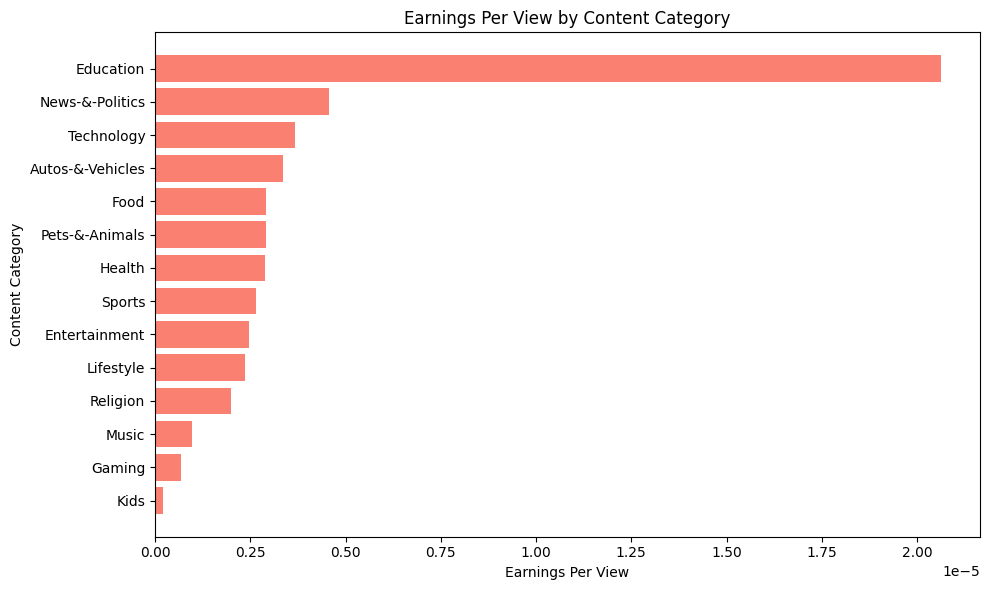

In [20]:
# Define the query to calculate Earnings per View by Category
query = """
SELECT 
    c.Category,
    SUM(CAST(p.Views AS FLOAT)) AS Total_Views,
    SUM(CAST(p.max_Estimated_Earning AS FLOAT)) AS Total_Max_Earnings,
    SUM(CAST(p.max_Estimated_Earning AS FLOAT)) / NULLIF(SUM(CAST(p.Views AS FLOAT)), 0) AS Earnings_Per_View
FROM performance p
JOIN channels c ON p.Channel_ID = c.Channel_ID
GROUP BY c.Category
ORDER BY Earnings_Per_View DESC;
"""

# Execute the query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_earnings_per_view = pd.read_sql(query, conn)
    conn.close()
    
    # Display the result
    print(df_earnings_per_view)
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.barh(df_earnings_per_view['Category'], df_earnings_per_view['Earnings_Per_View'], color='salmon')
    plt.xlabel('Earnings Per View')
    plt.ylabel('Content Category')
    plt.title('Earnings Per View by Content Category')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Conclusion: Earnings Per View by Content Category

The analysis of earnings per view across different content categories reveals that **Education** channels yield the highest earnings per view, significantly outperforming other categories. **News & Politics**, **Technology**, and **Autos & Vehicles** also demonstrate strong earnings per view, suggesting these categories may provide better revenue efficiency per view.

This insight can guide marketing efforts toward content categories that maximize revenue for each view, making categories like **Education** and **News & Politics** particularly attractive for targeted advertising and promotional campaigns.


# Which Content Categories Show the Strongest Correlation Between Engagement Rate and Subscriber Growth Rate?

C:\Users\khalil\AppData\Local\Temp\ipykernel_14524\2037937030.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_growth = pd.read_sql(query_growth, conn)


            Category  Avg_Engagement_Rate  Avg_Subscriber_Growth_Rate
0   Autos-&-Vehicles             3.257500                    0.004926
1          Education             3.940000                    0.036550
2      Entertainment             1.788582                    0.011153
3               Food             2.515833                    0.009229
4             Gaming             3.443509                    0.007717
5             Health             3.370000                    0.012252
6               Kids             0.000000                    0.003048
7          Lifestyle             2.528899                    0.009365
8              Music             3.063922                    0.004809
9    News-&-Politics             3.308000                    0.015922
10    Pets-&-Animals             1.240000                    0.007509
11          Religion             1.460000                    0.014706
12            Sports             1.962727                    0.010941
13        Technology

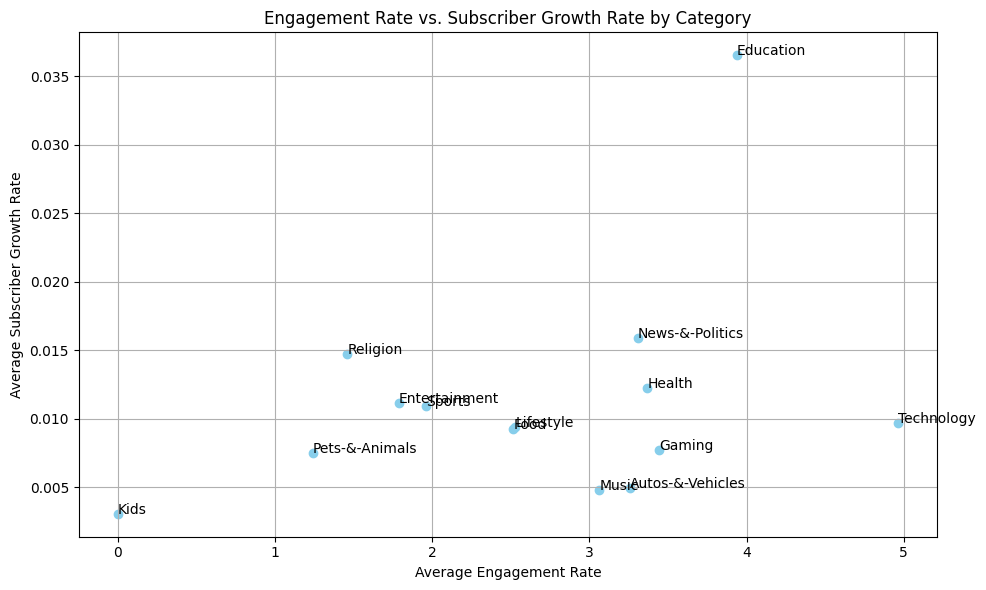

In [23]:
# Define the first query to calculate Subscriber Growth Rate for each channel
query_growth = """
SELECT 
    p.Channel_ID,
    c.Category,
    c.Engagement_Rate,
    (MAX(CAST(p.Subscribers AS FLOAT)) - MIN(CAST(p.Subscribers AS FLOAT))) / NULLIF(MIN(CAST(p.Subscribers AS FLOAT)), 0) AS Subscriber_Growth_Rate
FROM performance p
JOIN channels c ON p.Channel_ID = c.Channel_ID
GROUP BY p.Channel_ID, c.Category, c.Engagement_Rate
"""

# Execute the first query and fetch results into a pandas DataFrame
try:
    conn = pyodbc.connect(conn_str)
    df_growth = pd.read_sql(query_growth, conn)
    conn.close()
    
    # Calculate the average Engagement Rate and Subscriber Growth Rate by Category
    df_correlation = df_growth.groupby('Category').agg(
        Avg_Engagement_Rate=('Engagement_Rate', 'mean'),
        Avg_Subscriber_Growth_Rate=('Subscriber_Growth_Rate', 'mean')
    ).reset_index()
    
    # Display the result
    print(df_correlation)
    
    # Calculate correlation between Avg_Engagement_Rate and Avg_Subscriber_Growth_Rate for each category
    correlation = df_correlation[['Avg_Engagement_Rate', 'Avg_Subscriber_Growth_Rate']].corr().iloc[0, 1]
    print(f"Correlation between Engagement Rate and Subscriber Growth Rate: {correlation:.2f}")
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.scatter(df_correlation['Avg_Engagement_Rate'], df_correlation['Avg_Subscriber_Growth_Rate'], color='skyblue')
    for i, category in enumerate(df_correlation['Category']):
        plt.text(df_correlation['Avg_Engagement_Rate'][i], df_correlation['Avg_Subscriber_Growth_Rate'][i], category)
    plt.xlabel('Average Engagement Rate')
    plt.ylabel('Average Subscriber Growth Rate')
    plt.title('Engagement Rate vs. Subscriber Growth Rate by Category')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


### Conclusion: Engagement Rate vs. Subscriber Growth Rate by Category

The scatter plot illustrates the relationship between average engagement rate and subscriber growth rate across different content categories:

- **Education** stands out with a high subscriber growth rate, indicating that engaged viewers in this category are more likely to become subscribers.
- **Technology** and **News & Politics** also show relatively higher engagement rates, correlating with moderate subscriber growth. These categories may benefit from increased interaction.
- **Kids**  to analyze the Kids category without using restricted engagement metrics. Instead, we rely on views per video and subscriber growth rate 
- **Entertainment, Gaming, and Music** have moderate engagement but relatively low growth rates, implying that while viewers are engaged, they may not be converting into new subscribers as readily.

This insight suggests that focusing on categories like **Education** and **Technology**, where engagement directly impacts subscriber growth, could be beneficial for marketers aiming to expand their audience.
